# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

In [ ]:
#Setting up pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144' '52' 

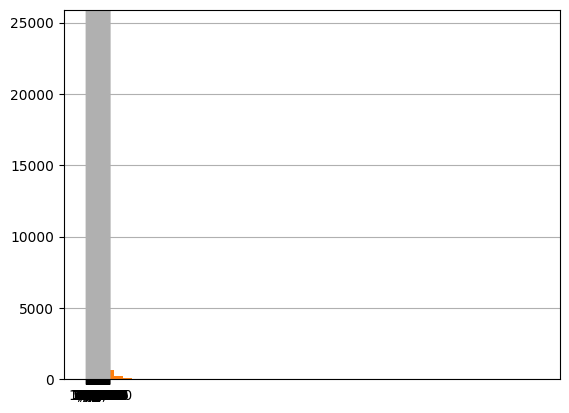

In [ ]:
df_airbnb = pd.read_csv('./airbnb_hw.csv', low_memory=False)
df_airbnb.tail()
var = 'Price'

print(df_airbnb[var].unique(), '\n')
print(df_airbnb[var].value_counts(), '\n')
print(df_airbnb[var].hist(), '\n')

df_airbnb[var] = df_airbnb[var].str.replace(',', '')
df_airbnb[var] = pd.to_numeric(df_airbnb[var], errors='coerce')

df_airbnb['var_nan'] = df_airbnb[var].isnull()
print('After coercion: \n', df_airbnb[var].describe(), '\n')
df_airbnb[var].hist()
print('Total Missings: \n', sum(df_airbnb['var_nan']), '\n')

In order to clean the Price variable I first viewed the variable data by using unique, value count, and trying to create a histogram. I then cleaned the data by removing the comma separator for values equal to or over 1,000. After that I then coerced the values to a numeric to also help create a better histogram graph. Originally upon viewing the dataset, I noticed that there were not any missing values but I included the missing dummy variable to ensure that any missing values were removed.

In [ ]:
df_mn = pd.read_csv('./mn_police_use_of_force.csv', low_memory=False)
var = 'subject_injury'

print(df_mn[var].unique(), '\n')
print(df_mn[var].value_counts(), '\n')

df_mn['var_nan'] = df_mn[var].isnull()
print('Total Missings: \n', sum(df_mn['var_nan']), '\n')
print('Total Not Missings: \n', sum(df_mn['var_nan'] == False), '\n')

pd.crosstab(df_mn['force_type'], df_mn['var_nan'])

[nan 'No' 'Yes'] 

subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 

Total Missings: 
 9848 

Total Not Missings: 
 3077 



var_nan,False,True
force_type,,
Baton,2,2
Bodily Force,2379,7051
Chemical Irritant,172,1421
Firearm,2,0
Gun Point Display,77,27
Improvised Weapon,74,74
Less Lethal,0,87
Less Lethal Projectile,3,0
Maximal Restraint Technique,0,170


In [ ]:
df_justice = pd.read_parquet('./justice_data.parquet')
var = 'WhetherDefendantWasReleasedPretrial'

print(df_justice[var].unique(), '\n')
df_justice[var] = df_justice[var].replace([9], np.nan)
print(df_justice[var].value_counts())

[9 0 1] 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
Name: count, dtype: int64


In [65]:
var = 'SentenceTypeAllChargesAtConvictionInContactEvent'
print(df_justice[var].unique(), '\n')
print(df_justice[var].value_counts(), '\n')

var ='ImposedSentenceAllChargeInContactEvent'
df_cond = df_justice[ df_justice[var].isin([9, 0, 1, 4, 2]) ]
print(df_cond[var].unique(), '\n')
df_cond[var].value_counts()

[9 0 1 4 2] 

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64 

[] 



,count
ImposedSentenceAllChargeInContactEvent,


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [79]:
df_shark = pd.read_excel('./GSAF5.xls')
print("df_shark.columns:")
print(df_shark.columns)

df_shark = df_shark.drop(columns=['pdf', 'href formula', 'href', 'Case Number.1', 'original order', 'Unnamed: 22'])

var = 'Year'
print(df_shark[var].unique(), '\n')
print("Attacks Over All Time: \n")
print(df_shark[var].value_counts(), '\n')
print(df_shark[var].describe())

print("Attacks 1940 and After: \n")
print(df_shark[var].value_counts())
df_shark = df_shark[df_shark[var] >= 1940]
print(df_shark[var].describe())


df_shark.columns:
Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017.   nan 2016.
 2015. 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004.
 2003. 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993.
 1992. 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981.
 1980. 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968.
 1967. 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956.
 1955. 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945.
 1944. 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933.
 1932. 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921.
 1920. 1919. 1918. 1

In [ ]:
var = "Age"